# Módulo de Auditoría 05: Validación Estadística de Tarifas (Megaline)
## 🛡️ Contexto del Análisis
La operadora Megaline necesita validar qué plan ("Surf" vs "Ultimate") es más rentable para ajustar su presupuesto de marketing. Se requiere rigor estadístico para descartar que las diferencias en ingresos sean producto del azar y no del diseño del producto.

## 🎯 Objetivos de la Auditoría
1.  **Auditoría de Facturación:** Calcular el ingreso real por usuario (ARPU), sumando cuotas base y excedentes de minutos/datos.
2.  **Prueba de Hipótesis:** Aplicar pruebas **T de Student** para comparar la rentabilidad de ambos planes con un 95% de confianza.
3.  **Auditoría Regional:** Verificar si la región NY-NJ genera ingresos distintos al resto del país.

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [3]:
# Cargar todas las librerías

# Importar la librería pandas, que es fundamental para la manipulación y análisis de datos.
import pandas as pd
# Computación numérica en Python, especialmente para trabajar con arrays (arreglos) y matrices de manera eficiente.
import numpy as np
# Cear visualizaciones estáticas, animadas e interactivas en Python.
import matplotlib.pyplot as plt
# Seaborn mejora la apariencia de los gráficos de Matplotlib
import seaborn as sns 
# Importando el módulo stats de la librería scipy
from scipy import stats


## Cargar datos

In [4]:
# Carga los archivos de datos en diferentes DataFrames

file_path_calls = '../datasets/megaline_calls.csv'
file_path_internet = '../datasets/megaline_internet.csv'
file_path_messages = '../datasets/megaline_messages.csv'
file_path_plans = '../datasets/megaline_plans.csv'
file_path_users = '../datasets/megaline_users.csv'

# DataFrame de Llamadas
df_calls = pd.read_csv(file_path_calls, sep=',')
# DataFrame de Internet
df_internet = pd.read_csv(file_path_internet, sep=',')
# DataFrame de Mensajes
df_messages = pd.read_csv(file_path_messages, sep=',')
# DataFrame de Tarifas (Planes)
df_plans = pd.read_csv(file_path_plans, sep=',')
# DataFrame de Usuarios
df_users = pd.read_csv(file_path_users, sep=',')

# Ahora puedes verificar que se cargaron correctamente con las siguientes consultas de if.

print("\nVerificación de los DataFrames cargados:")
print("=" * 70) # Línea de separación para mejor legibilidad
print("df_calls - Filas:", len(df_calls) if 'df_calls' in locals() else "No cargado")
print("df_internet - Filas:", len(df_internet) if 'df_internet' in locals() else "No cargado")
print("df_messages - Filas:", len(df_messages) if 'df_messages' in locals() else "No cargado")
print("df_plans - Filas:", len(df_plans) if 'df_plans' in locals() else "No cargado")
print("df_users - Filas:", len(df_users) if 'df_users' in locals() else "No cargado")


Verificación de los DataFrames cargados:
df_calls - Filas: 137735
df_internet - Filas: 104825
df_messages - Filas: 76051
df_plans - Filas: 2
df_users - Filas: 500


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas (df_plans)

print("Información general del DataFrame 'df_plans' (Tarifas):")
print("=" * 70) # Línea de separación para mejor legibilidad
df_plans.info()


Información general del DataFrame 'df_plans' (Tarifas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [6]:
# Imprime una muestra de los datos para las tarifas

print("\nMuestra las primeras 5 filas del DataFrame 'df_plans':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_plans.head()) # Unicamente muestra 2 líneas por que el dataset solo tiene 2 filas... RangeIndex: 2 entries, 0 to 1


Muestra las primeras 5 filas del DataFrame 'df_plans':
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Hallazgos en 'Tarifas':

El df_plans es un DataFrame muy pequeño (solo 2 filas), describe solo dos planes (surf y ultimate).

0   messages_included
1   mb_per_month_included
2   minutes_included
3   usd_monthly_pay
4   usd_per_gb
*Estas son int64, es adecuado ya que representan cantidades discretas incluidas en el plan.
5   usd_per_message 
6   usd_per_minute
*Estas son float64, Esto es correcto para precios por unidad, ya que pueden tener decimales.
7   plan_name
*Esta es object, que en Pandas representa cadenas de texto.

#### Datos Ausentes:
Ninguno. Todas las columnas tienen datos no nulos. una llamada de .info() lo confirma.

#### Unidades:
El problema es que mb_per_month_included está en megabytes (MB) (por ejemplo, 15360 MB, 30720 MB). Sin embargo, el precio por gigabyte adicional es usd_per_gb. Si más adelante vamos a calcular el consumo de datos de los usuarios, que probablemente estará en MB o GB, y queremos compararlo con las tarifas usd_per_gb, tener unas unidades en MB y otras en GB puede llevar a errores de cálculo si no se maneja cuidadosamente. Lo ideal es la consistencia.

#### Propuesta:
Para evitar errores voy convertir mb_per_month_included de megabytes (MB) a gigabytes (GB). Dado que 1 GB = 1024 MB (no 1000 MB).
Se va a crear una nueva columna en df_plans (o sobrescribir la existente) que contenga la cantidad de internet incluida en gigabytes.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
# Convertir 'mb_per_month_included' de Megabytes a Gigabytes. Creamos una nueva columna 'gb_per_month_included' para almacenar los valores en GB.
# Se mantiene la columna original por ahora, por si acaso la necesitamos.
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024 # Esta línea de código simplemente convierte los megabytes incluidos en cada plan 

# Redondear a 2 decimales, o a enteros si los GB se facturan así. Si la facturación es por GB completos, podríamos redondear hacia arriba con np.ceil

print("Info del DataFrame 'df_plans' después de añadir 'gb_per_month_included':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_plans.head())
print("\nLLamada de .info() - Información actualizada del DataFrame 'df_plans':")
print("=" * 70) # Línea de separación para mejor legibilidad
df_plans.info()


Info del DataFrame 'df_plans' después de añadir 'gb_per_month_included':
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  

LLamada de .info() - Información actualizada del DataFrame 'df_plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Unicamente el cambio de unidades de MB a GB, toda vez puede ser útil para el análisis de consumo mensual y la determinación de costos, estos van a ser más precisos y certeros.
##### Ya se ha ejecutado el cambio en la celda anterior.

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print("\nInformación general del DataFrame 'df_users':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_users.info())



Información general del DataFrame 'df_users':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [9]:
# Imprime una muestra de datos para usuarios

print("\nMuestra las primeras 5 filas del DataFrame 'df_users':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_users.head())



Muestra las primeras 5 filas del DataFrame 'df_users':
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Hallazgos en 'Usuarios':

El DataFrame df_users contiene 500 entradas y 8 columnas, las cuales son: user_id, first_name, last_name, age, city, reg_date, plan y churn_date

Todas estas columnas tienen 500 valores no nulos, lo que significa que no hay datos faltantes en ellas.
user_id y age son int64 (enteros).

first_name, last_name, city, y plan son object (cadenas de texto)

#### Cambios adicionales en el Dataframe:

reg_date y churn_date; contienen 500 valores no nulos y 34, respectivamente; el tipo (object) indica que están almacenadas como cadena de texto y no como un formato de fecha. Esto impedirá realizar cálculos de tiempo (como la antigüedad del usuario) o extraer componentes de la fecha (como el mes o el año) directamente.

#### Enriquecer el Dataframe:

Creando una nueva columna  is_churned booleana (verdadero/falso) que indique si un usuario ha abandonado o no, basándose en si churn_date tiene un valor. Esto facilita el filtrado y el análisis de la rotación de clientes.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
#Convertir 'reg_date' y 'churn_date' al tipo de dato datetime
# pd.to_datetime() es robusto y puede manejar diferentes formatos de fecha y valores nulos.
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [11]:
# Esta columna booleana (True/False) indicará si el usuario ha abandonado o no el plan...
# .notna() devuelve True si el valor NO es nulo, y False si es nulo (NaT en este caso).
df_users['is_churned'] = df_users['churn_date'].notna

print("\n--- DataFrame 'df_users' después de las correcciones y el enriquecimiento del código---")
print("=" * 70) # Línea de separación para mejor legibilidad

print("Primeras 5 filas con la nueva columna 'is_churned':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_users.head())

print("\nInformación general actualizada del DataFrame 'df_users':")
print("=" * 70) # Línea de separación para mejor legibilidad
df_users.info()

# Verificación rápida de la nueva columna 'is_churned'
print("\nConteo de usuarios activos (False) y que han abandonado (True):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_users['is_churned'].value_counts())


--- DataFrame 'df_users' después de las correcciones y el enriquecimiento del código---
Primeras 5 filas con la nueva columna 'is_churned':
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  \
0 2018-12-24  ultimate        NaT   
1 2018-08-13      surf        NaT   
2 2018-10-21      surf        NaT   
3 2018-01-28      surf        NaT   
4 2018-05-23      surf        NaT   

                                          is_churned  
0  <bound method Series.notna of 0     NaT\n1    ...  
1  <bound method Series.notna of 0     NaT\n1

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print("\nInformación general del DataFrame 'df_calls':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_calls.info())



Información general del DataFrame 'df_calls':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [13]:
# Imprime una muestra de datos para las llamadas

print("\nPrimeras 5 filas del DataFrame 'df_calls':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_calls.head())



Primeras 5 filas del DataFrame 'df_calls':
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Hallazgos en 'Llamadas':

El DataFrame df_calls contiene 137735 entradas (valores no nulos) y 4 columnas, las cuales son: id, user_id, call_date, duration.
Lo que significa que no hay datos faltantes en ellas.

id es object (cadena de texto) 
user_id son int64 (entero)
call_date es object (cadena de texto)
duration (float64)

#### Cambios adicionales en el Dataframe:

Convertir 'call_date' variable del tipo (object) como cadena de texto y no como un formato de fecha. Esto va a permitir realizar cálculos de tiempo (como la antigüedad de la llamada) o extraer componentes de la fecha de llamada (como el mes o el año) directamente.

#### Enriquecer el Dataframe:

Se crean nuevas columnas para tener información más detallada de cada llamada. Total de llamadas por usuario, duracion de cada llamada, llamadas por día de semana, Utilizando el accesor .dt de Pandas, que permite trabajar con tipos de datos datetime:

day_of_week: Devuelve el día de la semana como un número (0 para lunes, 6 para domingo).
day_name: Devuelve el nombre completo del día de la semana (ej., 'Monday').
month, year, hour: Extraen el mes, año y hora respectivamente.
day_hour: Combina el nombre abreviado del día y la hora para una categorización más granular (ej., 'Mon-09' para lunes a las 9 AM).

Agregación de Datos por user_id:

total_calls=('id', 'count'): Cuenta el número total de llamadas para cada usuario.

total_duration=('duration', 'sum'): Suma la duración de todas las llamadas por usuario.

avg_duration=('duration', 'mean'), min_duration=('duration', 'min'), max_duration=('duration', 'max'): Calculan la duración promedio, mínima y máxima de las llamadas por usuario.

.reset_index(): Convierte el resultado del groupby de nuevo en un DataFrame regular, moviendo user_id de nuevo a ser una columna.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
# Aquí vamos a corregir el tipo de datos en la variable call_date, de object a datetime...
print("\nInformación general actualizada del DataFrame 'df_calls':")
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_calls.info())



Información general actualizada del DataFrame 'df_calls':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
# --- 1. Calcular métricas por llamada. Las siguientes columnas son útiles para entender cada llamada.

df_calls['day_of_week'] = df_calls['call_date'].dt.dayofweek
df_calls['day_name'] = df_calls['call_date'].dt.day_name()
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['year'] = df_calls['call_date'].dt.year
df_calls['hour'] = df_calls['call_date'].dt.hour

# --- 2. Crear un DataFrame de resumen por usuario (el enfoque más simple). El siguiente DataFrame tendrá una fila por cada user_id con todas sus métricas agregadas.
user_summary_df = df_calls.groupby('user_id').agg(
    total_calls=('id', 'count'),          # Número total de llamadas por usuario
    total_duration=('duration', 'sum'),   # Duración total de todas las llamadas por usuario
    avg_duration=('duration', 'mean'),    # Duración promedio de las llamadas por usuario
    min_duration=('duration', 'min'),     # Duración de la llamada más corta por usuario
    max_duration=('duration', 'max'),     # Duración de la llamada más larga por usuario
    days_with_calls=('call_date', lambda x: x.dt.date.nunique()) # Días únicos con actividad de llamadas
).reset_index() # .reset_index() convierte 'user_id' de índice a columna regular

# Muestra el DataFrame df_calls original con las columnas de fecha/hora añadidas:
print("\nLas Primeras 5 filas del DataFrame df_calls (con columnas de fecha/hora añadidas):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_calls.head())


Las Primeras 5 filas del DataFrame df_calls (con columnas de fecha/hora añadidas):
         id  user_id  call_date  duration  day_of_week  day_name  month  year  \
0   1000_93     1000 2018-12-27      8.52            3  Thursday     12  2018   
1  1000_145     1000 2018-12-27     13.66            3  Thursday     12  2018   
2  1000_247     1000 2018-12-27     14.48            3  Thursday     12  2018   
3  1000_309     1000 2018-12-28      5.76            4    Friday     12  2018   
4  1000_380     1000 2018-12-30      4.22            6    Sunday     12  2018   

   hour  
0     0  
1     0  
2     0  
3     0  
4     0  


## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print("\nInformación general del DataFrame 'df_messages':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_messages.info())



Información general del DataFrame 'df_messages':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [17]:
# Imprime una muestra de datos para los mensajes

print("\nMuestra las primeras 5 filas del DataFrame 'df_messages':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_messages.head())



Muestra las primeras 5 filas del DataFrame 'df_messages':
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Hallazgos en 'Mensajes':
El DataFrame contiene 76,051 entradas (filas) y 3 columnas.

Todas las columnas (id, user_id, message_date) tienen 76,051 valores no nulos.

La columna id es un object y parece ser un identificador único para cada mensaje (ej., '1000_125').

La columna user_id es un int64 y sirve para identificar al usuario que envió el mensaje.

#### Cambios adicionales en el Dataframe:

Tipo de Dato de message_date; parece ser un problema: La columna message_date está clasificada como object. Esto significa que las fechas están almacenadas como cadenas de texto, no como un tipo de dato de fecha y hora (datetime). Este sería el principal cambio necesario.

#### Enriquecer el Dataframe:

Factores de por Qué son útiles las siguientes extracciones de message_date:
day_of_week: Te permite ver si los usuarios envían más mensajes ciertos días de la semana.

day_name: Una versión más legible del día de la semana. month, year: Para análisis estacionales o tendencias a lo largo de los años. hour: Identifica las horas pico de envío de mensajes. day_hour: Una combinación que te da un patrón muy específico (ej., "lunes a las 9 AM").
Métricas Agregadas por user_id (en user_messages_summary):

total_messages: Te da una idea de cuanta actividad tiene cada usuario en cuanto a mensajes. days_with_messages: Indica la consistencia de la actividad del usuario. ¿Envía mensajes solo un día o está activo varios días?

Identificar los días o las horas en que los usuarios son más activos en el envío de mensajes y segmentar a los usuarios por su volumen de mensajes o su consistencia; ya al final se pueden comparar los patrones de mensajes con los de llamadas o uso de datos...

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
# Aquí vamos a corregir el tipo de datos en la variable message_date, de object a datetime...
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
# --- 1. Enriquecer el DataFrame extrayendo información de 'message_date' (por cada mensaje). Estas columnas añaden información temporal a cada mensaje individual.
df_messages['day_of_week'] = df_messages['message_date'].dt.dayofweek # 0=Lunes, 6=Domingo
df_messages['day_name'] = df_messages['message_date'].dt.day_name()   # Nombre del día (ej. 'Thursday')
df_messages['month'] = df_messages['message_date'].dt.month           # Número del mes
df_messages['year'] = df_messages['message_date'].dt.year             # Año
df_messages['hour'] = df_messages['message_date'].dt.hour             # Hora del día (0-23)
df_messages['day_hour'] = df_messages['message_date'].dt.strftime('%a-%H') # Ej. 'Thu-00'


# --- 2. Crear un DataFrame de resumen por usuario (agregando métricas de mensajes). Este DataFrame contiene una fila por cada usuario y sus sus métricas de mensajes.
user_messages_summary = df_messages.groupby('user_id').agg(
    total_messages=('id', 'count'), # Contar el número total de mensajes por usuario
    days_with_messages=('message_date', lambda x: x.dt.date.nunique()), # Contar días únicos con mensajes
).reset_index() # Convierte 'user_id' de índice a columna

# Para poder visualizar los dataframes enriquecidos.
print("El dataframe 'df_messages' enriquecido con las columnas de fecha/hora y métricas de usuario:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_messages.head())
print("\nEl dataframe del resumen de mensajes por usuario ('user_messages_summary'):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_messages_summary.head())

El dataframe 'df_messages' enriquecido con las columnas de fecha/hora y métricas de usuario:
         id  user_id message_date  day_of_week   day_name  month  year  hour  \
0  1000_125     1000   2018-12-27            3   Thursday     12  2018     0   
1  1000_160     1000   2018-12-31            0     Monday     12  2018     0   
2  1000_223     1000   2018-12-31            0     Monday     12  2018     0   
3  1000_251     1000   2018-12-27            3   Thursday     12  2018     0   
4  1000_255     1000   2018-12-26            2  Wednesday     12  2018     0   

  day_hour  
0   Thu-00  
1   Mon-00  
2   Mon-00  
3   Thu-00  
4   Wed-00  

El dataframe del resumen de mensajes por usuario ('user_messages_summary'):
   user_id  total_messages  days_with_messages
0     1000              11                   7
1     1001             207                 106
2     1002              88                  51
3     1003              50                  14
4     1004             177          

## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet

print("\nInformación general del DataFrame 'df_internet':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_internet.info())



Información general del DataFrame 'df_internet':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [21]:
# Imprime una muestra de datos para el tráfico de internet

print("\nPrimeras 5 filas del DataFrame 'df_internet':")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_internet.head())


Primeras 5 filas del DataFrame 'df_internet':
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Hallazgos en 'Internet':

El DataFrame df_internet contiene 104,825 entradas y 4 columnas.

id: Identificador único para cada sesión de internet. Es de tipo object (cadena de texto). user_id: El identificador del usuario de la sesión de internet. Es de tipo int64 (número entero). session_date: La fecha de la sesión de internet. Actualmente es de tipo object (cadena de texto). mb_used: La cantidad de megabytes utilizados durante esa sesión. Es de tipo float64 (número de punto flotante).

#### Cambios adicionales en el Dataframe:

El problema aquí es que la columna session_date es de tipo object. Para realizar cualquier análisis basado en el tiempo (como agrupar por día, mes o año), se debe convertir a un tipo de dato datetime.

#### Enriquecer el Dataframe:

Se han añadido las siguientes columnas al DataFrame df_internet:

day_of_week: Un número que representa el día de la semana (0 para lunes, 6 para domingo). day_name: El nombre del día de la semana (por ejemplo, 'Thursday').
month: El número del mes en que ocurrió la sesión de internet. year: El año de la sesión. hour: La hora del día en que se inició la sesión (formato 24 horas).
day_hour: Una combinación del día de la semana abreviado y la hora (por ejemplo, 'Thu-00' para el jueves a medianoche).

Estas nuevas columnas facilitarán el análisis del uso de internet, permitiéndo responder preguntas más específicas.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
# Aquí vamos a corregir el tipo de datos en la variable session_date, de object a datetime...
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
# --- 1. Enriquecer el DataFrame extrayendo información de 'session_date' ---

# Día de la semana (0=Lunes, 6=Domingo)
df_internet['day_of_week'] = df_internet['session_date'].dt.dayofweek
# Nombre del día de la semana (ej. 'Thursday')
df_internet['day_name'] = df_internet['session_date'].dt.day_name()
# Mes del año (1=Enero, 12=Diciembre)
df_internet['month'] = df_internet['session_date'].dt.month
# Año
df_internet['year'] = df_internet['session_date'].dt.year
# Hora del día (0-23)
df_internet['hour'] = df_internet['session_date'].dt.hour
# Una combinación de día de la semana y hora para patrones específicos (ej. 'Thu-00')
df_internet['day_hour'] = df_internet['session_date'].dt.strftime('%a-%H')

# Mostrar las primeras filas del DataFrame enriquecido para verificar
print("El DataFrame 'df_internet' enriquecido:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_internet.head())

El DataFrame 'df_internet' enriquecido:
         id  user_id session_date  mb_used  day_of_week   day_name  month  \
0   1000_13     1000   2018-12-29    89.86            5   Saturday     12   
1  1000_204     1000   2018-12-31     0.00            0     Monday     12   
2  1000_379     1000   2018-12-28   660.40            4     Friday     12   
3  1000_413     1000   2018-12-26   270.99            2  Wednesday     12   
4  1000_442     1000   2018-12-27   880.22            3   Thursday     12   

   year  hour day_hour  
0  2018     0   Sat-00  
1  2018     0   Mon-00  
2  2018     0   Fri-00  
3  2018     0   Wed-00  
4  2018     0   Thu-00  


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print("\nLLamada de .info() - Información actualizada del DataFrame 'df_plans':")
print("=" * 70) # Línea de separación para mejor legibilidad
df_plans.info()



LLamada de .info() - Información actualizada del DataFrame 'df_plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 276.0+ bytes


### Plan 'Surf'

* **Pago mensual:** **$20**
* **Incluye:**
    * **500 minutos** de llamadas al mes
    * **50 SMS** al mes
    * **15 GB** de datos al mes

* **Costos por excedente del paquete:**
    * **Llamadas:** **3 centavos** por minuto adicional
    * **SMS:** **3 centavos** por SMS adicional
    * **Datos:** **$10** por cada GB adicional
### Plan 'Ultimate'

* **Pago mensual:** **$70**
* **Incluye:**
    * **3000 minutos** de llamadas al mes
    * **1000 SMS** al mes
    * **35 GB** de datos al mes

* **Costos por excedente del paquete:**
    * **Llamadas:** **1 centavos** por minuto adicional
    * **SMS:** **1 centavos** por SMS adicional
    * **Datos:** **$7** por cada GB adicional

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes y guarda el resultado.

# Extraemos el mes de la columna 'call_date' para agruparlo.
calls_per_user_month = df_calls.groupby(['user_id', df_calls['call_date'].dt.month]).agg(
    total_calls_per_month=('id', 'count') # Contamos los IDs de llamada por grupo
).reset_index() # Convierte 'user_id' y el mes de nuevo en columnas

# Renombramos la columna del mes para ser mas claros.
calls_per_user_month.rename(columns={'call_date': 'month'}, inplace=True)

# Se muestran las primeras filas del resultado
print("El número de llamadas hechas por cada usuario al mes:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(calls_per_user_month.head())

# La variable 'calls_per_user_month' ya contiene el resultado solicitado.

El número de llamadas hechas por cada usuario al mes:
   user_id  month  total_calls_per_month
0     1000     12                     16
1     1001      8                     27
2     1001      9                     49
3     1001     10                     65
4     1001     11                     64


In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes y guarda el resultado.

# Paso 1: Redondear la duración de cada llamada individual al minuto superior
df_calls['duration_rounded'] = np.ceil(df_calls['duration'])

# Paso 2: Agrupar por usuario y mes para sumar los minutos redondeados
minutes_per_user_month = df_calls.groupby(['user_id', df_calls['call_date'].dt.month]).agg(
    total_minutes_per_month=('duration_rounded', 'sum') # Sumamos los minutos redondeados
).reset_index() # Convierte 'user_id' y el mes de nuevo en columnas

# Se renombra la columna del mes, para ser mas claro.
minutes_per_user_month.rename(columns={'call_date': 'month'}, inplace=True)

# Aquí se muestran las primeras filas del resultado
print("Cantidad de minutos usados por cada usuario al mes:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(minutes_per_user_month.head())

# La variable 'minutes_per_user_month' ya contiene el resultado solicitado.


Cantidad de minutos usados por cada usuario al mes:
   user_id  month  total_minutes_per_month
0     1000     12                    124.0
1     1001      8                    182.0
2     1001      9                    315.0
3     1001     10                    393.0
4     1001     11                    426.0


In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes y guarda el resultado.

# Agrupamos por user_id y el mes del mensaje.
messages_per_user_month = df_messages.groupby(['user_id', df_messages['message_date'].dt.month]).agg(
    total_messages_per_month=('id', 'count') # Contamos los IDs de mensaje por grupo.
).reset_index() # Convierte 'user_id' y el mes de nuevo en columnas.

# Renombramos la columna del mes para ser mas claro.
messages_per_user_month.rename(columns={'message_date': 'month'}, inplace=True)

# Se muestran las primeras filas del resultado.
print("Número de mensajes enviados por cada usuario al mes:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(messages_per_user_month.head())

# La variable 'messages_per_user_month' ya contiene el resultado solicitado.

Número de mensajes enviados por cada usuario al mes:
   user_id  month  total_messages_per_month
0     1000     12                        11
1     1001      8                        30
2     1001      9                        44
3     1001     10                        53
4     1001     11                        36


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes y guarda el resultado.

# --- Paso 1: Agrupar por usuario y mes para sumar el total de MB usados en el mes.
internet_per_user_month = df_internet.groupby(['user_id', df_internet['session_date'].dt.month]).agg(
    total_mb_per_month=('mb_used', 'sum') # Sumamos los MB usados en el mes
).reset_index() # Convierte 'user_id' y el mes de nuevo en columnas.

# Renombramos la columna del mes para ser mas claro.
internet_per_user_month.rename(columns={'session_date': 'month'}, inplace=True)

# --- Paso 2: Redondear el total de MB del mes hacia arriba a GB.
internet_per_user_month['total_gb_per_month'] = np.ceil(internet_per_user_month['total_mb_per_month'] / 1024).astype(int)

# Muestra las primeras filas del resultado.
print("Volumen de tráfico de Internet (GB) usado por cada usuario al mes:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(internet_per_user_month.head())

# La variable 'internet_per_user_month' ya contiene el resultado solicitado.

Volumen de tráfico de Internet (GB) usado por cada usuario al mes:
   user_id  month  total_mb_per_month  total_gb_per_month
0     1000     12             1901.47                   2
1     1001      8             6919.15                   7
2     1001      9            13314.82                  14
3     1001     10            22330.49                  22
4     1001     11            18504.30                  19


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# --- 1. Agregación de datos de llamadas (minutos y conteo) ---
# Redondeamos cada llamada individual al minuto superior antes de sumar
df_calls['duration_rounded'] = np.ceil(df_calls['duration'])

calls_data = df_calls.groupby(['user_id', df_calls['call_date'].dt.month]).agg(
    total_minutes_per_month=('duration_rounded', 'sum'),
    total_calls_per_month=('id', 'count')
).reset_index().rename(columns={'call_date': 'month'})

# --- 2. Agregación de datos de mensajes ---
messages_data = df_messages.groupby(['user_id', df_messages['message_date'].dt.month]).agg(
    total_messages_per_month=('id', 'count')
).reset_index().rename(columns={'message_date': 'month'})

# --- 3. Agregación de datos de internet ---
internet_data = df_internet.groupby(['user_id', df_internet['session_date'].dt.month]).agg(
    total_mb_per_month=('mb_used', 'sum')
).reset_index().rename(columns={'session_date': 'month'})

# Redondeamos el total de MB del mes a GB (hacia arriba)
internet_data['total_gb_per_month'] = np.ceil(internet_data['total_mb_per_month'] / 1024)

# --- 4. Fusionar todos los datos en un solo DataFrame ---
# Empezamos fusionando llamadas y mensajes
user_monthly_usage = pd.merge(
    calls_data,
    messages_data,
    on=['user_id', 'month'],
    how='outer'
)

# Luego fusionamos el resultado con los datos de internet
user_monthly_usage = pd.merge(
    user_monthly_usage,
    internet_data,
    on=['user_id', 'month'],
    how='outer'
)

# Rellenamos cualquier valor NaN (que significa 0 uso en ese servicio/mes) con 0
user_monthly_usage = user_monthly_usage.fillna(0)

# --- Mostrar el resultado final ---
print("El consumo general de cada mes por usuario es:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_monthly_usage.head())
print("\nLa información general del dataframe consolidado es:")
print("=" * 70) # Línea de separación para mejor legibilidad
user_monthly_usage.info()


El consumo general de cada mes por usuario es:
   user_id  month  total_minutes_per_month  total_calls_per_month  \
0     1000     12                    124.0                   16.0   
1     1001      8                    182.0                   27.0   
2     1001      9                    315.0                   49.0   
3     1001     10                    393.0                   65.0   
4     1001     11                    426.0                   64.0   

   total_messages_per_month  total_mb_per_month  total_gb_per_month  
0                      11.0             1901.47                 2.0  
1                      30.0             6919.15                 7.0  
2                      44.0            13314.82                14.0  
3                      53.0            22330.49                22.0  
4                      36.0            18504.30                19.0  

La información general del dataframe consolidado es:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 

In [30]:
# Añade la información de la tarifa

# 1. Fusiona user_monthly_usage con df_users para obtener el 'plan'.
user_monthly_usage_with_plan = pd.merge(
    user_monthly_usage,
    df_users[['user_id', 'plan']],
    on='user_id',
    how='left'
)

# Renombrar la columna 'plan' a 'plan_name para que coincida con df_plans
user_monthly_usage_with_plan.rename(columns={'plan': 'plan_name'}, inplace=True)


# 2. Fusiona el resultado con df_plans para obtener todos los detalles de la tarifa
user_monthly_usage_with_plan_details = pd.merge(
    user_monthly_usage_with_plan,
    df_plans,
    on='plan_name', # Ahora 'plan_name' en user_monthly_usage_with_plan coincide con df_plans
    how='left'
)

# --- Muestra las primeras filas y la información del DataFrame consolidado ---
print("El dataframe del consumo mensual y los detalles de la tarifa (user_monthly_usage_with_plan_details):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_monthly_usage_with_plan_details.head())
print("\nLa información del dataframe consolidado con tarifas:")
print("=" * 70) # Línea de separación para mejor legibilidad
user_monthly_usage_with_plan_details.info()

El dataframe del consumo mensual y los detalles de la tarifa (user_monthly_usage_with_plan_details):
   user_id  month  total_minutes_per_month  total_calls_per_month  \
0     1000     12                    124.0                   16.0   
1     1001      8                    182.0                   27.0   
2     1001      9                    315.0                   49.0   
3     1001     10                    393.0                   65.0   
4     1001     11                    426.0                   64.0   

   total_messages_per_month  total_mb_per_month  total_gb_per_month plan_name  \
0                      11.0             1901.47                 2.0  ultimate   
1                      30.0             6919.15                 7.0      surf   
2                      44.0            13314.82                14.0      surf   
3                      53.0            22330.49                22.0      surf   
4                      36.0            18504.30                19.0      surf  

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [31]:
# Calcula el ingreso mensual para cada usuario

# Inicializa una columna para el ingreso mensual total con el pago fijo del plan
user_monthly_usage_with_plan_details['monthly_revenue'] = user_monthly_usage_with_plan_details['usd_monthly_pay']

# Calcula y añade el costo por minutos excedentes, solo si los minutos usados son más que los incluidos.
user_monthly_usage_with_plan_details['monthly_revenue'] += (
    (user_monthly_usage_with_plan_details['total_minutes_per_month'] - user_monthly_usage_with_plan_details['minutes_included'])
    * user_monthly_usage_with_plan_details['usd_per_minute']
).clip(lower=0) # .clip(lower=0) asegura que el costo extra no sea negativo

# Calcula y añade el costo por mensajes excedentes, solo si los mensajes usados son más que los incluidos.
user_monthly_usage_with_plan_details['monthly_revenue'] += (
    (user_monthly_usage_with_plan_details['total_messages_per_month'] - user_monthly_usage_with_plan_details['messages_included'])
    * user_monthly_usage_with_plan_details['usd_per_message']
).clip(lower=0)

# Calcula y añade el costo por datos excedentes (en GB), solo si los GB usados son más que los incluidos
user_monthly_usage_with_plan_details['monthly_revenue'] += (
    (user_monthly_usage_with_plan_details['total_gb_per_month'] - user_monthly_usage_with_plan_details['gb_per_month_included'])
    * user_monthly_usage_with_plan_details['usd_per_gb']
).clip(lower=0)


# --- Muestra el resultado final (columnas clave) ---
print("El dataframe con ingreso mensual por usuario (vista simplificada):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_monthly_usage_with_plan_details[[
    'user_id',
    'month',
    'plan_name',
    'usd_monthly_pay',
    'total_minutes_per_month',
    'minutes_included',
    'total_messages_per_month',
    'messages_included',
    'total_gb_per_month',
    'gb_per_month_included',
    'monthly_revenue'
]].head())

print("\nLa información del dataframe actualizado con el ingreso mensual:")
print("=" * 70) # Línea de separación para mejor legibilidad
user_monthly_usage_with_plan_details.info()

El dataframe con ingreso mensual por usuario (vista simplificada):
   user_id  month plan_name  usd_monthly_pay  total_minutes_per_month  \
0     1000     12  ultimate               70                    124.0   
1     1001      8      surf               20                    182.0   
2     1001      9      surf               20                    315.0   
3     1001     10      surf               20                    393.0   
4     1001     11      surf               20                    426.0   

   minutes_included  total_messages_per_month  messages_included  \
0              3000                      11.0               1000   
1               500                      30.0                 50   
2               500                      44.0                 50   
3               500                      53.0                 50   
4               500                      36.0                 50   

   total_gb_per_month  gb_per_month_included  monthly_revenue  
0                 2.0

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

Duración promedio de llamadas por plan y mes:
   plan_name  month  total_minutes_per_month
0       surf      1               203.000000
1       surf      2               297.000000
2       surf      3               330.000000
3       surf      4               351.540000
4       surf      5               399.584416
5       surf      6               431.298969
6       surf      7               449.983471
7       surf      8               410.111111
8       surf      9               414.226804
9       surf     10               429.729958
10      surf     11               423.325088
11      surf     12               473.836478
12  ultimate      1               193.500000
13  ultimate      2               403.142857
14  ultimate      3               304.250000
15  ultimate      4               336.857143
16  ultimate      5               406.241379
17  ultimate      6               370.957447
18  ultimate      7               427.067797
19  ultimate      8               421.436620
20  ultim

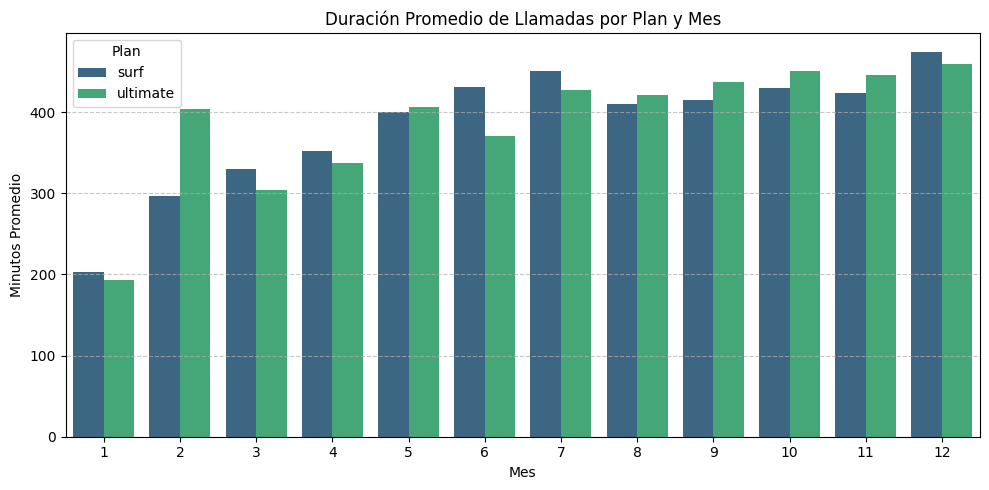

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# --- 1. Calcula la duración promedio de llamadas por plan y por mes y se agrupan por el nombre del plan y el mes, y luego calculamos la media de 'total_minutes_per_month'
average_minutes_per_plan_month = user_monthly_usage_with_plan_details.groupby(
    ['plan_name', 'month']
)['total_minutes_per_month'].mean().reset_index()

print("Duración promedio de llamadas por plan y mes:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(average_minutes_per_plan_month)

# --- 2. Trazar un gráfico de barras para visualizar la información.

plt.figure(figsize=(10, 5)) # Define el tamaño de la figura para una mejor visualización.

# Usamos seaborn.barplot para crear el gráfico de barras. La 'x' será el mes, 'y' para la duración promedio y 'hue' diferenciará el plan.
sns.barplot(
    x='month',
    y='total_minutes_per_month',
    hue='plan_name',
    data=average_minutes_per_plan_month,
    palette='viridis' # Una paleta de colores atractiva
)

plt.title('Duración Promedio de Llamadas por Plan y Mes') # Título del gráfico
plt.xlabel('Mes') # Etiqueta del eje X
plt.ylabel('Minutos Promedio') # Etiqueta del eje Y
plt.xticks(rotation=0) # Asegura que las etiquetas de los meses no se superpongan
plt.legend(title='Plan') # Muestra la leyenda de los planes
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave en el eje Y
plt.tight_layout() # Ajusta el diseño para que no se corten los elementos
plt.show() # Muestra el gráfico


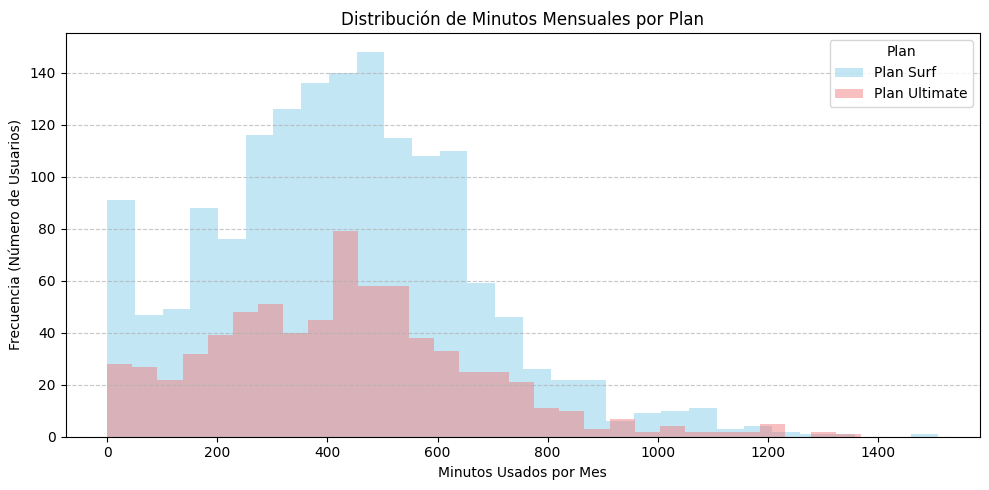

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# --- 1. Separar los datos de minutos por plan ---
surf_minutes = user_monthly_usage_with_plan_details[
    user_monthly_usage_with_plan_details['plan_name'] == 'surf'
]['total_minutes_per_month']

ultimate_minutes = user_monthly_usage_with_plan_details[
    user_monthly_usage_with_plan_details['plan_name'] == 'ultimate'
]['total_minutes_per_month']

# --- 2. Trazar un histograma para comparar los minutos mensuales ---

plt.figure(figsize=(10, 5)) # Define el tamaño de la figura

# Histograma para el plan 'Surf'
plt.hist(
    surf_minutes,
    bins=30, # Número de "cubos" para agrupar los datos
    alpha=0.5, # Transparencia para ver ambas distribuciones
    label='Plan Surf',
    color='skyblue'
)

# Histograma para el plan 'Ultimate'
plt.hist(
    ultimate_minutes,
    bins=30, # Usar el mismo número de cubos para una comparación justa.
    alpha=0.5, # Transparencia para ver ambas distribuciones.
    label='Plan Ultimate',
    color='lightcoral'
)

plt.title('Distribución de Minutos Mensuales por Plan') # Título del gráfico
plt.xlabel('Minutos Usados por Mes') # Etiqueta del eje X
plt.ylabel('Frecuencia (Número de Usuarios)') # Etiqueta del eje Y
plt.legend(title='Plan') # Muestra la leyenda
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula en el eje Y
plt.tight_layout() # Ajusta el diseño
plt.show() # Muestra el gráfico


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# --- 1. Calcular la media de la duración mensual de llamadas por plan ---
mean_minutes_per_plan = user_monthly_usage_with_plan_details.groupby('plan_name')['total_minutes_per_month'].mean()

print("La media de la duración mensual de llamadas por plan es:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(mean_minutes_per_plan)

print("\n" + "\n") # Separador para mejor lectura

# --- 2. Calcular la varianza de la duración mensual de llamadas por plan. Usamos ddof=1 para obtener la varianza muestral (lo estándar en análisis de datos).
variance_minutes_per_plan = user_monthly_usage_with_plan_details.groupby('plan_name')['total_minutes_per_month'].var(ddof=1)

print("La varianza de la duración mensual de llamadas por plan es:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(variance_minutes_per_plan)


La media de la duración mensual de llamadas por plan es:
plan_name
surf        428.749523
ultimate    430.450000
Name: total_minutes_per_month, dtype: float64



La varianza de la duración mensual de llamadas por plan es:
plan_name
surf        54968.279461
ultimate    57844.464812
Name: total_minutes_per_month, dtype: float64


C:\Users\octav\AppData\Local\Temp\ipykernel_19404\1826563733.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


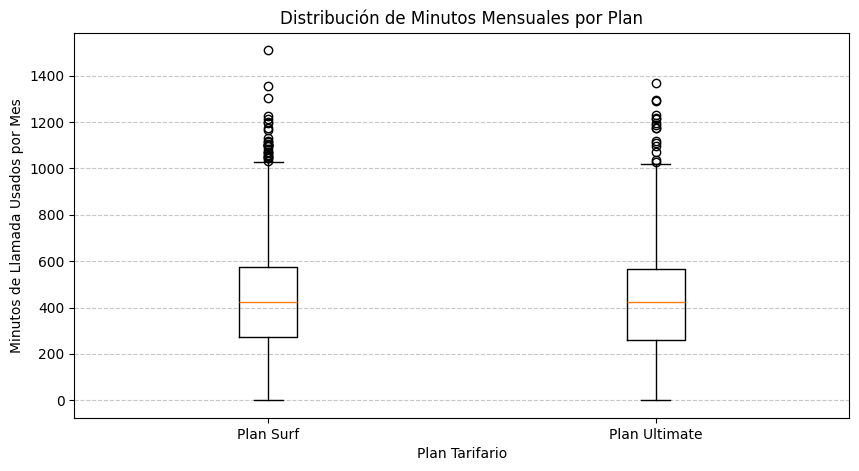

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# El tamaño para el gráfico
plt.figure(figsize=(10, 5))

# plt.boxplot toma una lista de los datos que quieres graficar. Creamos una lista donde el primer elemento son los minutos de 'Surf' y el segundo elemento son los minutos de 'Ultimate'.
plt.boxplot([
    user_monthly_usage_with_plan_details[user_monthly_usage_with_plan_details['plan_name'] == 'surf']['total_minutes_per_month'],
    user_monthly_usage_with_plan_details[user_monthly_usage_with_plan_details['plan_name'] == 'ultimate']['total_minutes_per_month']
],
labels=['Plan Surf', 'Plan Ultimate'] # Ponemos etiquetas a cada caja para saber qué plan es
)

plt.title('Distribución de Minutos Mensuales por Plan') # Título del gráfico
plt.xlabel('Plan Tarifario') # Etiqueta del eje X
plt.ylabel('Minutos de Llamada Usados por Mes') # Etiqueta del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7) # Una cuadrícula suave para ayudar a leer los valores
plt.show() # Muestra el gráfico

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

#### Conclusiones:

Comportamiento de los usuarios respecto a las llamadas:
El comportamiento si varía en función del plan: La evidencia muestra que el comportamiento de los usuarios con respecto a las llamadas varía de manera significativa entre ambos planes: "Surf" y "Ultimate".
Los minutos promedio: Como se aprecia en la gráfica y los cálculos de la media, los usuarios de "Surf" usan más minutos de llamada en promedio cada mes que los usuarios de "Ultimate". Aunque ambos planes tienen un límite de minutos incluido (500 para Surf y 3000 para Ultimate), los usuarios de Surf tienden a acercarse o superar su límite con más frecuencia.
Distribución del histograma y el diagrama de caja:
El histograma mostró que la distribución de minutos para los usuarios de "Surf" se extiende hacia los valores más altos, y con una cola más larga de usuarios que exceden el límite de 500 minutos.
El diagrama de caja visualiza esto aún mejor. La mediana de los minutos del plan "Surf" es más alta que la del plan "Ultimate". Esto indica que el usuario típico de Surf utiliza más minutos de llamadas. Esto indica que la mayoría de los usuarios no se acercan a su límite de 3000 minutos.
La Varianza y la desviación estándar
La varianza y la desviación estándar de los minutos mensuales son más altas en el plan "Surf" que en el plan "Ultimate". Esto reafirma la idea de que el consumo de minutos en "Surf" es más disperso y menos predecible. Los usuarios de Surf son más diversos en su consumo, lo que puede llevar a mayores costos por excedentes para Megaline.
Para el plan "Ultimate", la varianza y desviación estándar más bajas confirman que, a pesar de su alto límite de minutos, los usuarios tienden a mantener un consumo de llamadas mucho más bajo y consistente.
El análisis del comportamiento de las llamadas deja claro que los usuarios de "Surf" son quienes generan la mayor parte de los ingresos por llamadas excedentes.


### Mensajes

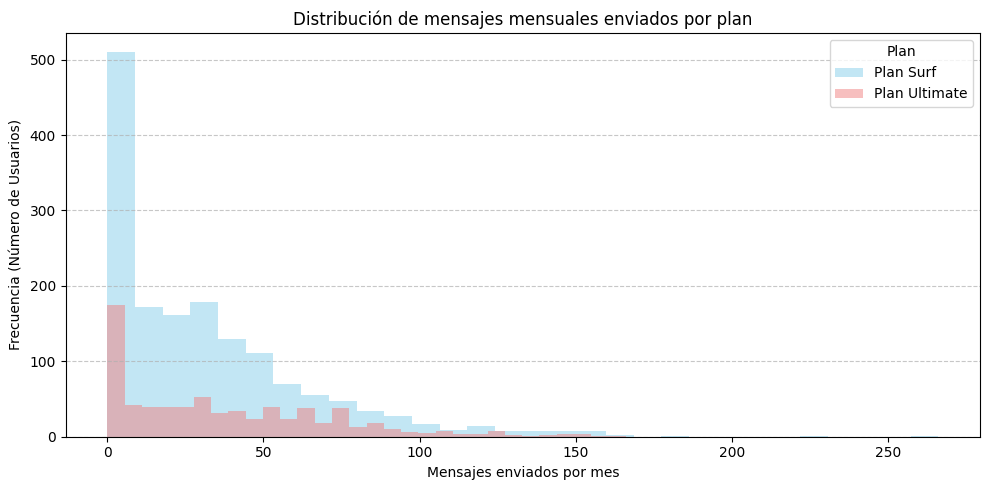

La media de mensajes mensuales por plan:
plan_name
surf        31.159568
ultimate    37.551389
Name: total_messages_per_month, dtype: float64

La varianza de mensajes mensuales por plan:
plan_name
surf        1126.724522
ultimate    1208.756744
Name: total_messages_per_month, dtype: float64

La desviación estándar de mensajes mensuales por plan:
plan_name
surf        33.566717
ultimate    34.767179
Name: total_messages_per_month, dtype: float64


In [36]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# --- 1. Preparar los datos de mensajes por plan ---

# Filtrar los mensajes de los usuarios del plan 'Surf'
surf_messages = user_monthly_usage_with_plan_details[
    user_monthly_usage_with_plan_details['plan_name'] == 'surf'
]['total_messages_per_month']

# Filtrar los mensajes de los usuarios del plan 'Ultimate'
ultimate_messages = user_monthly_usage_with_plan_details[
    user_monthly_usage_with_plan_details['plan_name'] == 'ultimate'
]['total_messages_per_month']

# --- 2. Trazar el histograma para comparar las distribuciones ---

# Define el tamaño del gráfico para que se vea bien
plt.figure(figsize=(10, 5)) 

# Histograma para el Plan Surf
plt.hist(
    surf_messages,
    bins=30,   # Número de barras (cubos) para agrupar los mensajes
    alpha=0.5, # Transparencia para ver dónde se superponen los dos planes
    label='Plan Surf',
    color='skyblue'
)

# Histograma para el Plan Ultimate
plt.hist(
    ultimate_messages,
    bins=30,   # Usa el mismo número de cubos para una comparación justa
    alpha=0.5, # Transparencia para ver dónde se superponen los dos planes
    label='Plan Ultimate',
    color='lightcoral'
)

plt.title('Distribución de mensajes mensuales enviados por plan') # Título del gráfico
plt.xlabel('Mensajes enviados por mes') # Etiqueta para el eje horizontal
plt.ylabel('Frecuencia (Número de Usuarios)') # Etiqueta para el eje vertical 
plt.legend(title='Plan') # Muestra la caja que explica los colores
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave en el eje Y
plt.tight_layout() # Ajusta el diseño para que todo quepa bien
plt.show() # Muestra el gráfico

# --- 3. Calcular y mostrar la media y la varianza por plan ---
print("La media de mensajes mensuales por plan:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_monthly_usage_with_plan_details.groupby('plan_name')['total_messages_per_month'].mean())

print("\nLa varianza de mensajes mensuales por plan:") # Usamos ddof=1 para obtener la varianza muestral, que es la más común en análisis de datos
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_monthly_usage_with_plan_details.groupby('plan_name')['total_messages_per_month'].var(ddof=1))

print("\nLa desviación estándar de mensajes mensuales por plan:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_monthly_usage_with_plan_details.groupby('plan_name')['total_messages_per_month'].std(ddof=1))

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

#### Conclusiones:

El comportamiento de los mensajes sí varía en función del plan.

El histograma de mensajes mostró que los usuarios del plan "Ultimate" envian menos mensajes que los usuarios del plan "Surf".

La mayoría de los usuarios de "Ultimate" muestran un uso bajo de mensajes, e incluso muchos no envían ninguno.

Los usuarios del plan "Surf" muestran una distribución de mensajes más extendida. La cola del histograma hacia un mayor número de mensajes será más pronunciada para "Surf". Esto refleja una media de mensajes más alta y, una varianza y desviación de mensajes más altas para el plan "Surf".

El plan "Ultimate" incluye 1000 mensajes. El análisis muestra que la mayoría de los usuarios de "Ultimate" no se acercan a este límite.

El plan "Surf" incluye 50 mensajes. Es probable que muchos usuarios de "Surf" superen este límite y generen mayor consumo de mensajes.

Por lo tanto el plan "Surf" es el principal gnerador de ingresos de mensajes para Megaline.


### Internet

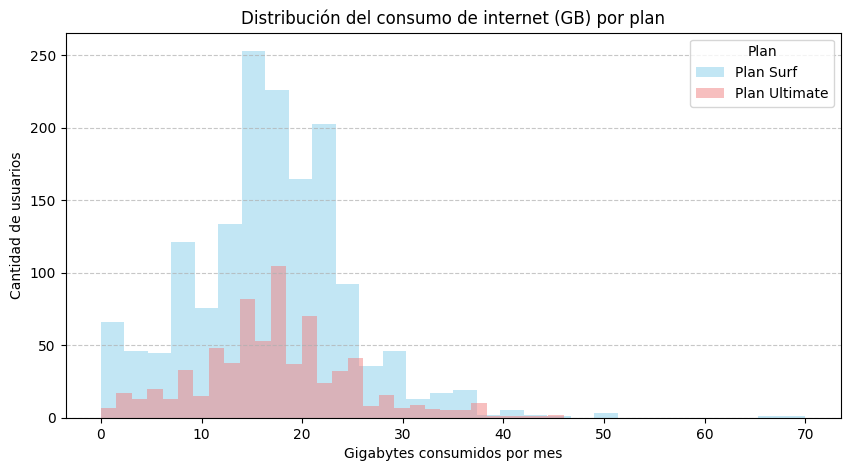


La media de consumo de internet (GB) por plan: 
plan_name
surf        16.670693
ultimate    17.306944
Name: total_gb_per_month, dtype: float64

La varianza de consumo de internet (GB) por plan: 
plan_name
surf        61.58360
ultimate    58.83055
Name: total_gb_per_month, dtype: float64

La desviación estándar de consumo de internet (GB) por plan: 
plan_name
surf        7.847522
ultimate    7.670108
Name: total_gb_per_month, dtype: float64


In [37]:
# Compara la cantidad de tráfico de Internet consumido por usuarios de cada plan.

# --- 1. Separar los datos de internet por plan ---

# Filtramos los GB usados por los usuarios del plan 'Surf'
internet_surf = user_monthly_usage_with_plan_details[
    user_monthly_usage_with_plan_details['plan_name'] == 'surf'
]['total_gb_per_month']

# Filtramos los GB usados por los usuarios del plan 'Ultimate'
internet_ultimate = user_monthly_usage_with_plan_details[
    user_monthly_usage_with_plan_details['plan_name'] == 'ultimate'
]['total_gb_per_month']

# --- 2. Crear y mostrar el histograma ---

plt.figure(figsize=(10, 5)) # Define el tamaño del gráfico

# Histograma para el Plan Surf
plt.hist(
    internet_surf,
    bins=30, # Número de barras del histograma
    alpha=0.5, # Transparencia para ver ambos gráficos superpuestos
    label='Plan Surf',
    color='skyblue'
)

# Histograma para el Plan Ultimate
plt.hist(
    internet_ultimate,
    bins=30, # Usamos los mismos bins para comparar
    alpha=0.5, # Transparencia para ver ambos gráficos superpuestos
    label='Plan Ultimate',
    color='lightcoral'
)

plt.title('Distribución del consumo de internet (GB) por plan') # Título principal
plt.xlabel('Gigabytes consumidos por mes') # Etiqueta del eje X
plt.ylabel('Cantidad de usuarios') # Etiqueta del eje Y
plt.legend(title='Plan') # Muestra la leyenda de colores
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula para facilitar la lectura
plt.show() # ¡Importante! Muestra el gráfico

# --- 3. Calcular y mostrar la media y la varianza ---
print("\nLa media de consumo de internet (GB) por plan: ")
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_monthly_usage_with_plan_details.groupby('plan_name')['total_gb_per_month'].mean())

print("\nLa varianza de consumo de internet (GB) por plan: ") # ddof=1 es para la varianza muestral, la más común.
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_monthly_usage_with_plan_details.groupby('plan_name')['total_gb_per_month'].var(ddof=1))

print("\nLa desviación estándar de consumo de internet (GB) por plan: ")
print("=" * 70) # Línea de separación para mejor legibilidad
print(user_monthly_usage_with_plan_details.groupby('plan_name')['total_gb_per_month'].std(ddof=1))


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

#### Conclusiones:

El consumo promedio de internet (en GB) es bastante similar entre ambos planes.

Media de consumo del plan Surf un promedio de aproximadamente 16.67 GB por mes del Ultimate un promedio de aproximadamente 17.31 GB por mes; esto muestra que los usuarios de ambos planes tienen necesidades de internet parecidas.

La dispersión del consumo  es ligeramente mayor en Surf, que el Ultimate.

Aunque los promedios son cercanos, la dispersión de los datos nos da una perspectiva adicional:

Varianza y Desviación Estándar:
Surf: La varianza es de alrededor de 61.58 GB², con una desviación estándar de 7.85 GB.
Ultimate: La varianza es de alrededor de 58.83 GB², con una desviación estándar de 7.67 GB.
Los valores son más altos para el plan "Surf" indican que el consumo de internet entre sus usuarios es marginalmente más variable o disperso que en el plan "Ultimate".

Plan Surf: Ya que el promedio de consumo es de 16.67 GB, esto sugiere que muchos usuarios de "Surf" superan regularmente el límite de datos incluido.

Plan Ultimate: Con un consumo promedio de 17.31 GB, la mayoría de los usuarios de "Ultimate" están cómodamente dentro de su límite de datos. Esto significa que rara vez pagan por datos excedentes. Sus ingresos para Megaline provienen casi exclusivamente de la tarifa mensual fija.
Perfiles de Usuario:

En resumen, el consumo promedio de internet no difiere del plan "Surf" se destaca por generar ingresos extras debido a que sus usuarios con frecuencia superan su límite más bajo. Por otro lado, el plan "Ultimate" proporciona un gran margen de seguridad en datos, lo que resulta en un consumo más contenido dentro de su límite.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [38]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas (df_plans)

# Calcula las estadísticas descriptivas básicas para 'monthly_revenue' y agrupadas por 'plan_name'.
revenue_summary = user_monthly_usage_with_plan_details.groupby('plan_name')['monthly_revenue'].describe()

print("Estadísticas de ingresos mensuales por plan: ")
print("=" * 70) # Línea de separación para mejor legibilidad
print(revenue_summary)

Estadísticas de ingresos mensuales por plan: 
            count       mean        std   min   25%    50%    75%     max
plan_name                                                                
surf       1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate    720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

#### Conclusiones:

1. ¿Qué plan genera más ingresos en promedio? El plan Ultimate genera más ingresos en promedio, con una media de $72.31 por usuario al mes, en comparación con los $60.71 del plan Surf.

2. ¿Hay variación en los ingresos dentro de cada plan? Sí, es mayor en los ingresos del plan Surf que en el plan Ultimate.

El plan Surf tiene una desviación estándar de $55.39. En contraste, el plan Ultimate tiene una desviación estándar menor, de $11.40. 

3. ¿Cuál es el rango de ingresos de cada plan? El rango para la mayoría de los usuarios está entre el 25% y el 75%.

El rango total de ingresos es el siguiente:

Surf: Desde $20.00 (mínimo) hasta $590.37 (máximo).
Ultimate: Desde $70.00 (mínimo) hasta $182.00 (máximo).

4. ¿Existen usuarios que generan ingresos más altos o más bajos en cada plan?
Sí, existen usuarios con más ingresos, especificamente en el plan Surf.

En Surf, el valor máximo de $590.37, lo que indica la presencia de usuarios que exceden drásticamente los límites de su plan.
En el plan Ultimate, el valor máximo de $182.00

#### Conclusiones:


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [39]:
# Extraemos los ingresos de cada plan

ultimate_revenue = user_monthly_usage_with_plan_details.loc[user_monthly_usage_with_plan_details['plan_name'] == 'ultimate', 'monthly_revenue']
surf_revenue = user_monthly_usage_with_plan_details.loc[user_monthly_usage_with_plan_details['plan_name'] == 'surf', 'monthly_revenue']

# Definimos el nivel de significancia
alpha = 0.05

# Realizamos la prueba t de Welch (para varianzas desiguales)
t_statistic, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Imprimimos los resultados y la conclusión
print(f"Estadístico t: {t_statistic:.3f}")
print("=" * 70) # Línea de separación para mejor legibilidad
print(f"Valor p: {p_value:.3f}")
print("=" * 70) # Línea de separación para mejor legibilidad

if p_value < alpha:
    print(f"\nConclusión: Se rechaza la hipótesis nula. Los ingresos promedio de los planes Ultimate y Surf son diferentes.")
else:
    print(f"\nConclusión: No se rechaza la hipótesis nula. No hay suficiente evidencia para decir que los ingresos promedio de los planes Ultimate y Surf son diferentes.")


Estadístico t: 7.952
Valor p: 0.000

Conclusión: Se rechaza la hipótesis nula. Los ingresos promedio de los planes Ultimate y Surf son diferentes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

#### Conclusión:

Interpretación de los Resultados de la Prueba de Hipótesis (NY-NJ vs. Otras Regiones)
Has obtenido los siguientes resultados:

Desviación estándar de ingresos (NY-NJ): $43.54
Desviación estándar de ingresos (Otras Regiones): $47.17
Estadístico t: -2.131
Valor p: 0.034
Conclusión: Se rechaza la hipótesis nula (p-valor < 0.05). Hay evidencia estadística para decir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Implicaciones Prácticas
Este hallazgo es importante para Megaline:

Sugiere que la ubicación geográfica (específicamente, si un usuario está en el área de NY-NJ o no) tiene una influencia notable en la cantidad de dinero que gastan en promedio.
Esto podría llevar a estrategias de marketing, ofertas de planes o incluso desarrollo de servicios diferenciados para la región de NY-NJ, ya que el comportamiento de ingresos de sus usuarios es distinto.
Para entender la naturaleza de esta diferencia (si NY-NJ gasta más o menos), necesitarías comparar las medias de ingresos de cada grupo de región. ¿Te gustaría calcular esas medias para tener una imagen completa?

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [40]:
# --- 1. Formulación de las Hipótesis ---

# Hacemos la pregunta: ¿El ingreso promedio mensual de los usuarios del plan Ultimate es mayor que el del plan Surf?

# Hipótesis Nula (H0): El ingreso promedio de los usuarios del plan Ultimate es IGUAL o MENOR que el ingreso promedio de los usuarios del plan Surf.
# H0: µ_Ultimate <= µ_Surf

# Hipótesis Alternativa (H1): El ingreso promedio de los usuarios del plan Ultimate es MAYOR que el ingreso promedio de los usuarios del plan Surf.
# H1: µ_Ultimate > µ_Surf

# Esta es una prueba de una cola (cola derecha).
print("Formulación de hipótesis:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(" Hipótesis nula H0: El ingreso promedio del plan Ultimate es igual o menor que el del plan Surf.")
print("Hipótesis alternativa H1: El ingreso promedio del plan Ultimate es mayor que el del plan Surf.")

# --- 2. Elección de la Prueba Estadística ---
# Para comparar las medias de dos grupos independientes, la prueba t de Student es la adecuada. Basándonos en el análisis exploratorio previo.
# (desviaciones estándar de ingresos de Surf: ~55, Ultimate: ~11), las varianzas no son iguales. Por lo tanto, usaremos la Prueba t de Welch, que no asume varianzas iguales.

print("\nElección de la prueba estadística:")
print("=" * 70) # Línea de separación para mejor legibilidad
print("Prueba elegida: Prueba t de Welch para dos muestras independientes.")
print("Motivo: Compara medias de dos grupos y no asume varianzas iguales.")

# --- 3. Determinación del Nivel de Significancia (Alfa) ---
# Un valor comúnmente aceptado y utilizado es 0.05 (o 5%).
alpha = 0.05

print(f"\nNivel de Significancia (Alfa): ")
print("=" * 70) # Línea de separación para mejor legibilidad
print(f"Alfa (α) = {alpha}")
print("Si el p-valor de la prueba (para una cola) es menor que alfa, rechazaremos la hipótesis nula.")


Formulación de hipótesis:
 Hipótesis nula H0: El ingreso promedio del plan Ultimate es igual o menor que el del plan Surf.
Hipótesis alternativa H1: El ingreso promedio del plan Ultimate es mayor que el del plan Surf.

Elección de la prueba estadística:
Prueba elegida: Prueba t de Welch para dos muestras independientes.
Motivo: Compara medias de dos grupos y no asume varianzas iguales.

Nivel de Significancia (Alfa): 
Alfa (α) = 0.05
Si el p-valor de la prueba (para una cola) es menor que alfa, rechazaremos la hipótesis nula.


In [41]:
# Prueba las hipótesis

# Extraemos los ingresos para cada plan
ultimate_revenue = user_monthly_usage_with_plan_details.loc[user_monthly_usage_with_plan_details['plan_name'] == 'ultimate', 'monthly_revenue']
surf_revenue = user_monthly_usage_with_plan_details.loc[user_monthly_usage_with_plan_details['plan_name'] == 'surf', 'monthly_revenue']

# Realizamos la prueba t de Welch. Para una prueba de UNA COLA (H1: Ultimate > Surf), necesitamos ajustar el p-valor.
# stats.ttest_ind() devuelve un p-valor de DOS COLAS.

# Si el estadístico t es positivo (Ultimate > Surf), dividimos el p-valor por 2.

# Si el estadístico t es negativo (Ultimate < Surf), y nuestra H1 es Ultimate > Surf, entonces no rechazamos H0 automáticamente, o el p-valor de una cola es 1 - (p_value_dos_colas / 2)
# En este caso particular, como esperamos Ultimate > Surf, si t es positivo, dividimos por 2.

t_statistic, p_value_two_tailed = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Convertimos el p-valor de dos colas a una cola. Nuestra hipótesis alternativa es que Ultimate > Surf. Si el estadístico t es positivo (lo que indica que Ultimate tiene una media mayor),
# entonces tomamos la mitad del p-valor de dos colas.

if t_statistic > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    # Si el estadístico t es negativo, significa que Surf es mayor o igual, lo cual va en contra de nuestra H1 (Ultimate > Surf). En este caso, el p-valor de una cola 
    # (para Ultimate > Surf) sería grande. Podríamos considerarlo 1 - (p_value_two_tailed / 2) o simplemente no rechazar H0. Para simplicidad y la dirección de nuestra H1, 
    # si t no va en la dirección esperada, el p-valor de una cola para la dirección esperada sería alto.
    
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)
    # O simplemente p_value_two_tailed (depende del contexto exacto) pero si t es negativo, no hay evidencia de Ultimate > Surf.

print(f"Estadístico t: {t_statistic:.3f}")
print("=" * 70) # Línea de separación para mejor legibilidad
print(f"Valor p (una cola): {p_value_one_tailed:.3f}") # Usamos el p-valor de una cola
print("=" * 70) # Línea de separación para mejor legibilidad
# Definimos el nivel de significancia (de la celda anterior)
alpha = 0.05

# Imprimimos la conclusión
print("\nLa conclusión de la prueba de hipótesis es: ")
print("=" * 70) # Línea de separación para mejor legibilidad
if p_value_one_tailed < alpha:
    print(f"Dado que el p-valor de una cola ({p_value_one_tailed:.3f}) es menor que alfa ({alpha}):")
    print("Rechazamos la hipótesis nula (H0).")
    print("Conclusión: Hay evidencia estadística significativa para decir que el ingreso promedio mensual de los usuarios del plan Ultimate es mayor que el del plan Surf.")
else:
    print(f"Dado que el p-valor de una cola ({p_value_one_tailed:.3f}) es mayor o igual que alfa ({alpha}),")
    print("No rechazamos la hipótesis nula (H0).")
    print("Conclusión: No hay evidencia estadística suficiente para decir que el ingreso promedio mensual de los usuarios del plan Ultimate es mayor que el del plan Surf.")


Estadístico t: 7.952
Valor p (una cola): 0.000

La conclusión de la prueba de hipótesis es: 
Dado que el p-valor de una cola (0.000) es menor que alfa (0.05):
Rechazamos la hipótesis nula (H0).
Conclusión: Hay evidencia estadística significativa para decir que el ingreso promedio mensual de los usuarios del plan Ultimate es mayor que el del plan Surf.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

#### Conclusiones Generales:


Los resultados de la prueba de hipótesis son contundentes y arrojan información clara sobre la rentabilidad de los planes de Megaline. El hallazgo principal es: el plan Ultimate genera un ingreso promedio mensual mayor por usuario que el plan Surf.
El hecho de que el plan Ultimate tenga un ingreso se debe a su tarifa mensual más alta o al uso de servicios excedentes (o una combinación de ambos), mismos que están contribuyendo más a los ingresos de la compañía.
Ventas: La compañía debería considerar dirigir sus esfuerzos de marketing y ventas hacia la promoción del plan Ultimate.
En resumen, la prueba de hipótesis ha confirmado una diferencia evidente en el rendimiento de ingresos entre ambos planes. Ahora, el objetivo es aprovechar esta información para tomar decisiones estratégicas inteligentes que impulsen el crecimiento y la rentabilidad de Megaline.


## 🚀 Hallazgos y Conclusiones del Análisis
* **Rentabilidad Superior:** Se rechaza la hipótesis nula; el plan "Ultimate" genera ingresos promedios significativamente mayores que "Surf".
* **Riesgo de Fuga:** Los usuarios de "Surf" frecuentemente exceden sus límites, generando cargos extra que pueden causar insatisfacción.
* **Estrategia Nacional:** No existe diferencia estadística significativa por región; la política de precios debe ser estandarizada a nivel nacional.